6. Линейная регрессия. Практика

In [85]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
import plotly.express as px

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [86]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
print(data.shape)
# (1338, 7)

(1338, 7)


In [88]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [90]:
fig = px.box(
    data,
    x = ['age', 'bmi', 'children'],
    # labels={'salary_in_usd': "зарплата (USD)", 'y': 'Распределение'},
    title='Распределение признаков',
    # marginal='box',
    )

fig.show()

In [91]:
fig = px.box(
    data,
    x = 'charges',
    labels={'salary_in_usd': "зарплата (USD)", 'y': 'Распределение'},
    title='Распределение расходов',
    # marginal='box',
    )

fig.show()

In [92]:
fig = px.histogram(
    data,
    x = ['age', 'bmi', 'children'],
    # labels={'salary_in_usd': "зарплата (USD)", 'y': 'Распределение'},
    title='Распределение признаков',
    # marginal='box',
    )

fig.show()

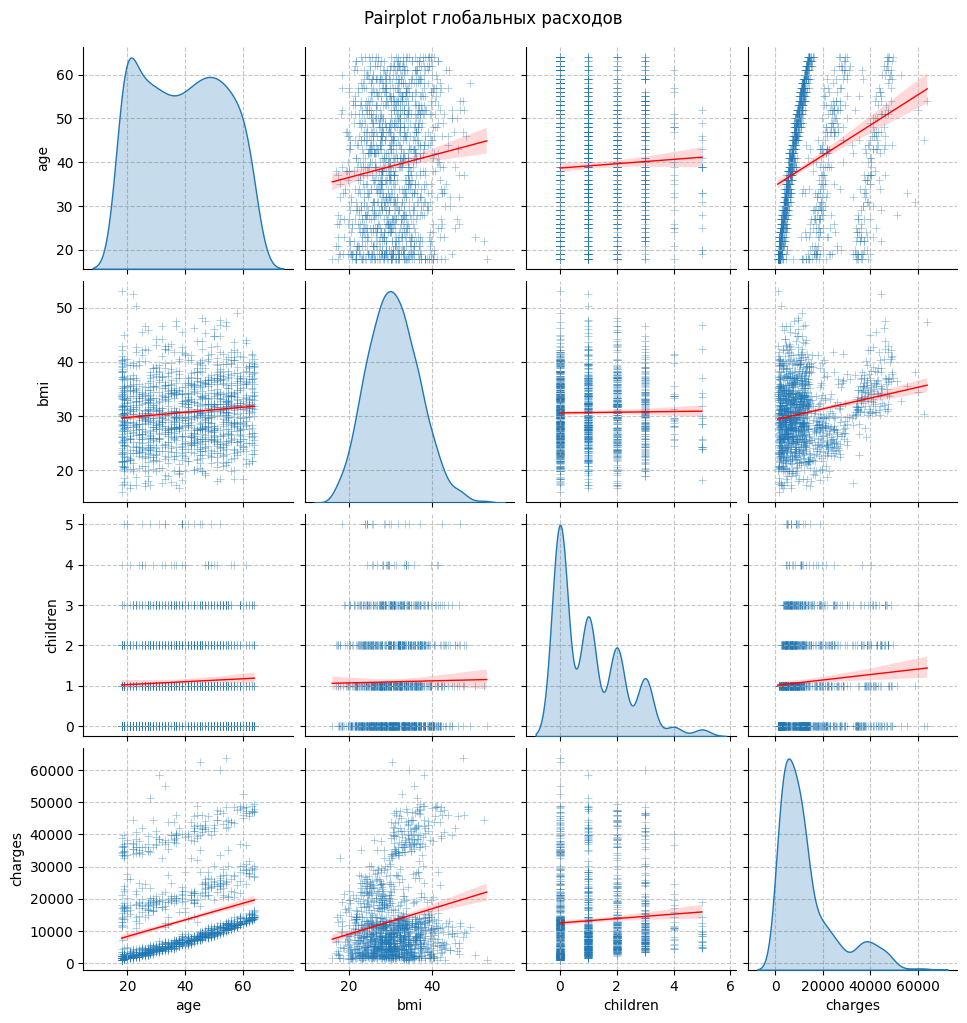

In [93]:
g = sns.pairplot(
    data[['age', 'bmi', 'children', 'charges']],
    diag_kind='kde',  # Используем KDE для диагональных графиков
    markers='+',  # Изменяем маркеры для улучшения читаемости
    plot_kws={'alpha': 0.5}  # Настраиваем параметры точек
)

# Добавляем заголовок
g.fig.suptitle('Pairplot глобальных расходов', y=1.02)

# Добавляем линейную регрессию на графики
for ax in g.axes.flatten():
    if ax.get_xlabel() and ax.get_ylabel():
        sns.regplot(
            x=ax.get_xlabel(),
            y=ax.get_ylabel(),
            data=data,
            scatter=False,
            ax=ax,
            line_kws={'color': 'red', 'lw': 1}
        )

# Добавляем сетку для лучшей читаемости
for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [94]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [95]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

Задание 6.1
1 point possible (graded)

Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(268, 9)

Задание 6.2
1 point possible (graded)
Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [97]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X_train, y_train)

LinearRegression()

In [98]:
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0

w0: -12390.804294570278


In [99]:
y_predict_test = lr_lstat.predict(X_test)

Задание 6.3
3/6 points (graded)
С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: , , . Не забудьте привести значение  к процентам.

Значение  округлите до трёх знаков после точки-разделителя, а значения  и  — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [100]:
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y_test, y_predict_test)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict_test))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_predict_test) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_predict_test)))

MAE score: 4181.194 thou. $
RMSE score: 5796.285 thou. $
MAPE score: 46.888 %
R2 score: 0.784


In [101]:
y_predict_train = lr_lstat.predict(X_train)

In [102]:
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y_train, y_predict_train)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_train, y_predict_train))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_predict_train) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_train, y_predict_train)))

MAE score: 4208.235 thou. $
RMSE score: 6105.545 thou. $
MAPE score: 42.203 %
R2 score: 0.742


Задание 6.4
1/1 point (graded)

Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием:  (без модуля).

Выберите верные ответы:

In [103]:
fig = px.box(
    # y_train-y_predict,
    x = y_train-y_predict_train,
    labels={'salary_in_usd': "зарплата (USD)", 'y': 'Распределение'},
    title='Распределение расходов',
    # marginal='box',
    )

fig.show()

In [104]:
fig = px.box(
    # y_train-y_predict,
    x = y_test - y_predict_test,
    labels={'salary_in_usd': "зарплата (USD)", 'y': 'Распределение'},
    title='Распределение расходов',
    # marginal='box',
    )

fig.show()

Задание 6.5
1 point possible (graded)
Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

Чему равно результирующее количество столбцов?

In [105]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.MinMaxScaler()
#Производим стандартизацию
X_train_scaled = scaler.fit_transform(X_train)
#Составляем DataFrame из результата
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.0,0.107345,0.4,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.0,0.224913,0.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.0,0.239440,0.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.0,0.493947,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.0,0.148238,0.6,0.0,0.0,1.0,0.0,0.0


In [106]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.MinMaxScaler()
#Производим стандартизацию
X_test_scaled = scaler.fit_transform(X_test)
#Составляем DataFrame из результата
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.586957,0.0,0.233748,0.4,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.0,0.369216,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.0,0.281560,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,1.0,0.249685,0.6,0.0,0.0,1.0,0.0,0.0
4,0.021739,1.0,0.422340,0.0,1.0,0.0,1.0,0.0,0.0


In [107]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(1070, 54)
(268, 54)


Задание 6.6
1 point possible (graded)
Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики  на тестовой выборке?

Значение  округлите до трёх знаков после запятой.

In [108]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

#Рассчитываем коэффициент детерминации для двух выборок
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Test R^2: 0.866


Задание 6.7
1 point possible (graded)

Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [109]:
print(np.round(lr_model_poly.coef_, 3))

[-3.06227002e+16  1.86235653e+17  5.08892343e+14  4.78013503e+15
  1.28211003e+16 -1.41917221e+16 -6.61624882e+15 -6.95752237e+15
 -4.20906736e+15  8.42000000e+03  8.26000000e+02  9.40000000e+02
 -1.67400000e+03  1.20000000e+02  3.06227002e+16  3.06227002e+16
  3.06227002e+16  3.06227002e+16 -1.53014624e+17  7.13750000e+02
 -1.22287500e+03  2.17125000e+02 -3.32210291e+16 -3.32210291e+16
 -3.32210291e+16 -3.32210291e+16 -9.68037500e+03  1.60443800e+03
  5.48209530e+04 -5.08892343e+14 -5.08892343e+14 -5.08892343e+14
 -5.08892343e+14 -2.04800000e+03 -2.23400000e+03 -4.78013503e+15
 -4.78013503e+15 -4.78013503e+15 -4.78013503e+15 -6.39877451e+15
 -6.42232583e+15 -6.42232583e+15 -6.42232583e+15 -6.42232583e+15
 -2.95896241e+15  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.05344357e+16  0.00000000e+00  0.00000000e+00 -1.01931622e+16
  0.00000000e+00 -1.29416172e+16]


Задание 6.8
3 points possible (graded)
Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики ,  и  на тестовой выборке?

Значение  округлите до трёх знаков после запятой, а значения  и  до целого числа.

In [110]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_poly, y_train)

#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_poly)

In [111]:
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

MAE score: 2683.522 thou. $
RMSE score: 4552.366 thou. $
MAPE score: 29.612 %
R2 score: 0.867


In [112]:
print(np.round(lasso_lr_poly.coef_, 3))

[ 3.2422170e+03 -4.9231400e+02  5.0761230e+03  4.5836210e+03
  1.9792860e+03  1.8802600e+02 -4.7077500e+02  5.8365700e+02
 -2.4354300e+02  8.2982680e+03  7.7458200e+02  8.4444900e+02
 -1.2077570e+03  1.3481000e+02 -1.0430970e+03 -0.0000000e+00
  1.1696420e+03  1.6176560e+03 -0.0000000e+00  5.0584800e+02
 -1.1342520e+03  2.6579700e+02 -1.2224050e+03  0.0000000e+00
  2.3621300e+02 -5.8003100e+02 -8.1796330e+03  1.2948780e+03
  5.4714855e+04  3.5853190e+03  2.4069020e+03 -9.6354900e+02
  0.0000000e+00 -1.6746430e+03 -2.0543650e+03  1.9420490e+03
  1.9539440e+03 -0.0000000e+00 -1.0636440e+03  8.0060000e+00
  5.9368900e+02 -0.0000000e+00 -2.3064300e+02  1.9793350e+03
  6.3161600e+02  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -6.0600000e-01]


Задание 6.9
1/3 points (graded)
Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики ,  и  на тестовой выборке?

Значение  округлите до трёх знаков после запятой, а значения  и  до целого числа.

In [116]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_poly)


In [118]:
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

MAE score: 2817.672 thou. $
RMSE score: 4593.892 thou. $
MAPE score: 30.783 %
R2 score: 0.864
